In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


mpl.style.use('fivethirtyeight')
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.5.2


In [50]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [51]:
alice_novel = open('data/alice_novel.txt','r').read()

In [52]:
type(alice_novel)

str

In [53]:
stopwords = set(STOPWORDS)

In [54]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [55]:
alice_wordcloud = WordCloud(background_color= 'white',max_words=2000, stopwords=stopwords)
alice_wordcloud.generate(alice_novel)

(-0.5, 399.5, 199.5, -0.5)

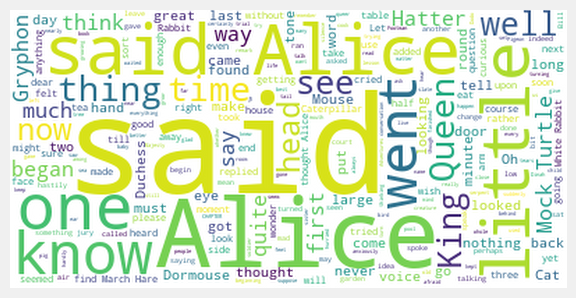

In [56]:
plt.imshow(alice_wordcloud, interpolation='lanczos')
plt.axis('off')

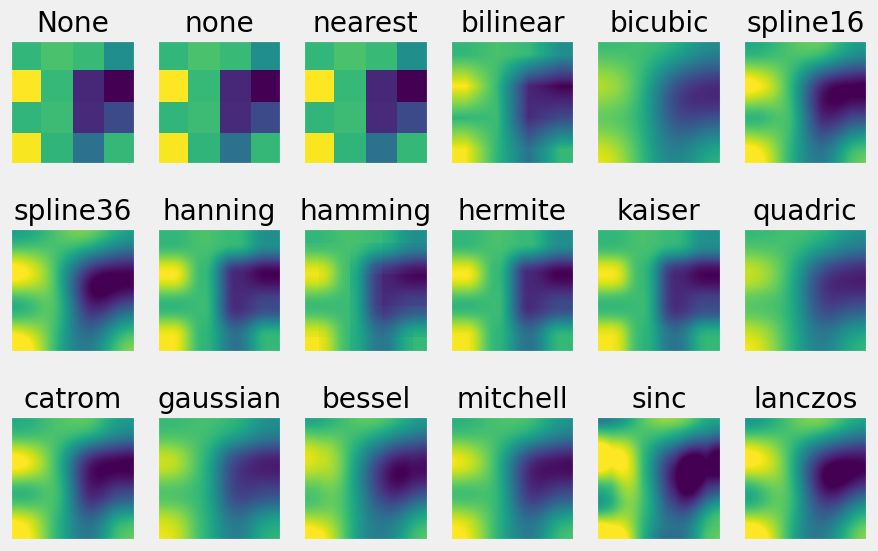

In [57]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
np.random.seed(19680801)
grid = np.random.rand(4,4)
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9,6),
                        subplot_kw={'xticks': [], 'yticks': []})
for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))
plt.tight_layout()

In [58]:
grid

array([[0.7003673 , 0.74275081, 0.70928001, 0.56674552],
       [0.97778533, 0.70633485, 0.24791576, 0.15788335],
       [0.69769852, 0.71995667, 0.25774443, 0.34154678],
       [0.96876117, 0.6945071 , 0.46638326, 0.7028127 ]])

(-0.5, 399.5, 199.5, -0.5)

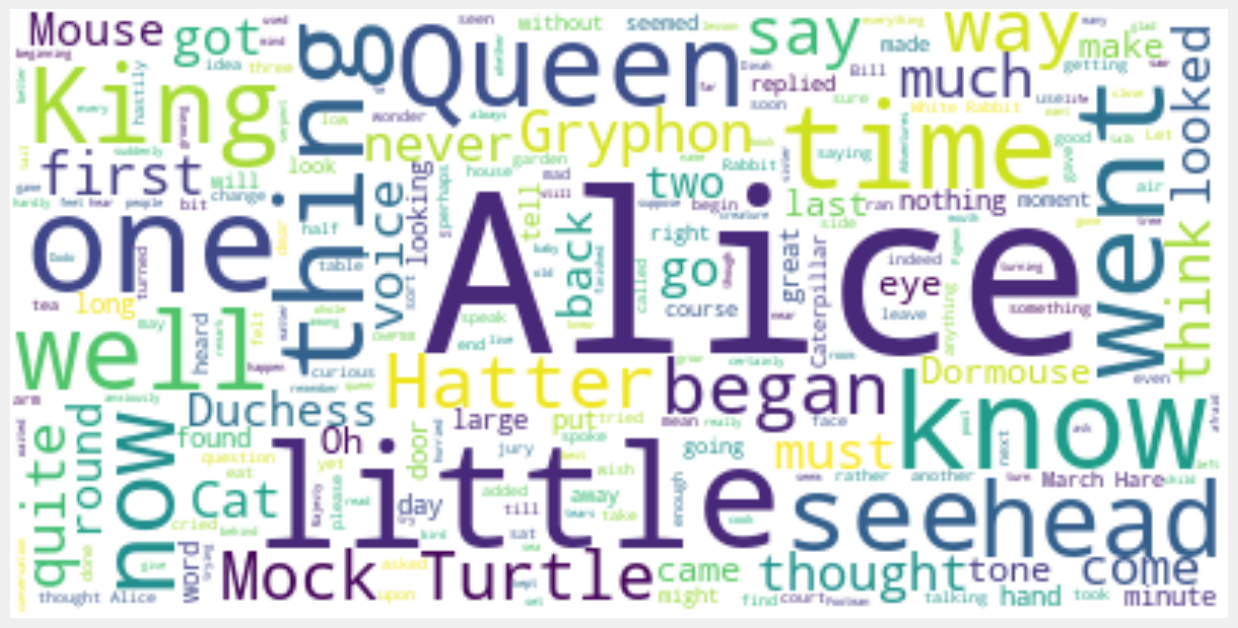

In [59]:
stopwords.add('said')
alice_wordcloud.generate(alice_novel)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wordcloud, interpolation='bilinear')
plt.axis('off')

# Masking

In [60]:
alice_mask = np.array(Image.open('data/alice_mask.png'))

In [61]:
alice_mask[400:501, 400:501]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(-0.5, 899.5, 899.5, -0.5)

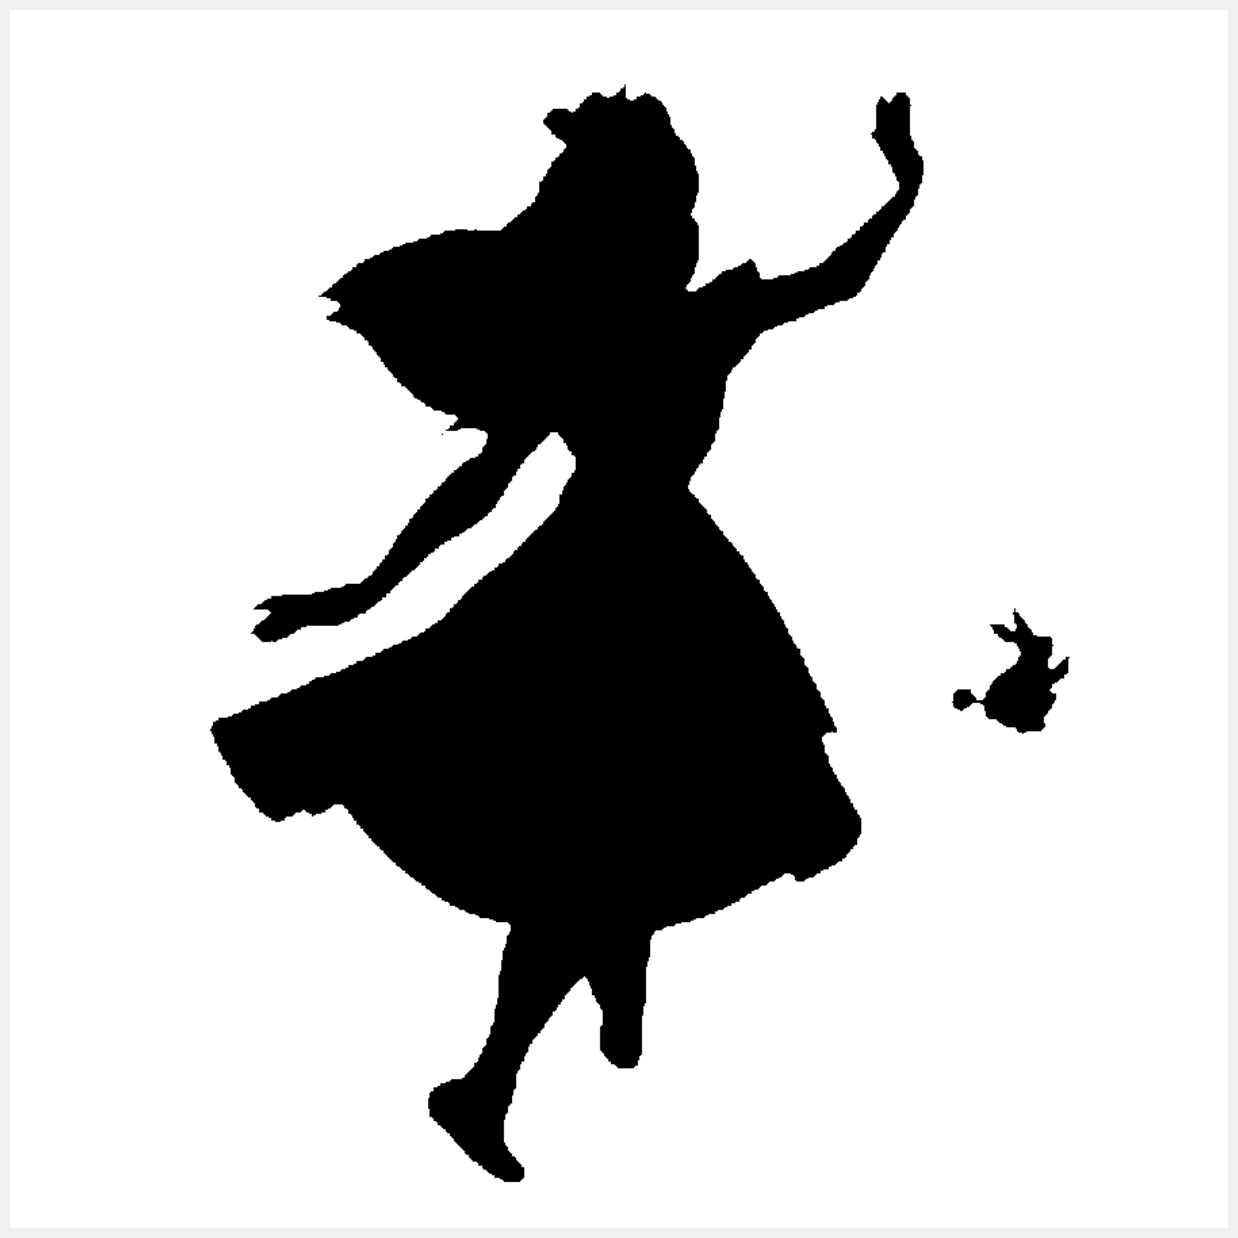

In [62]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_mask, cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off')

(-0.5, 899.5, 899.5, -0.5)

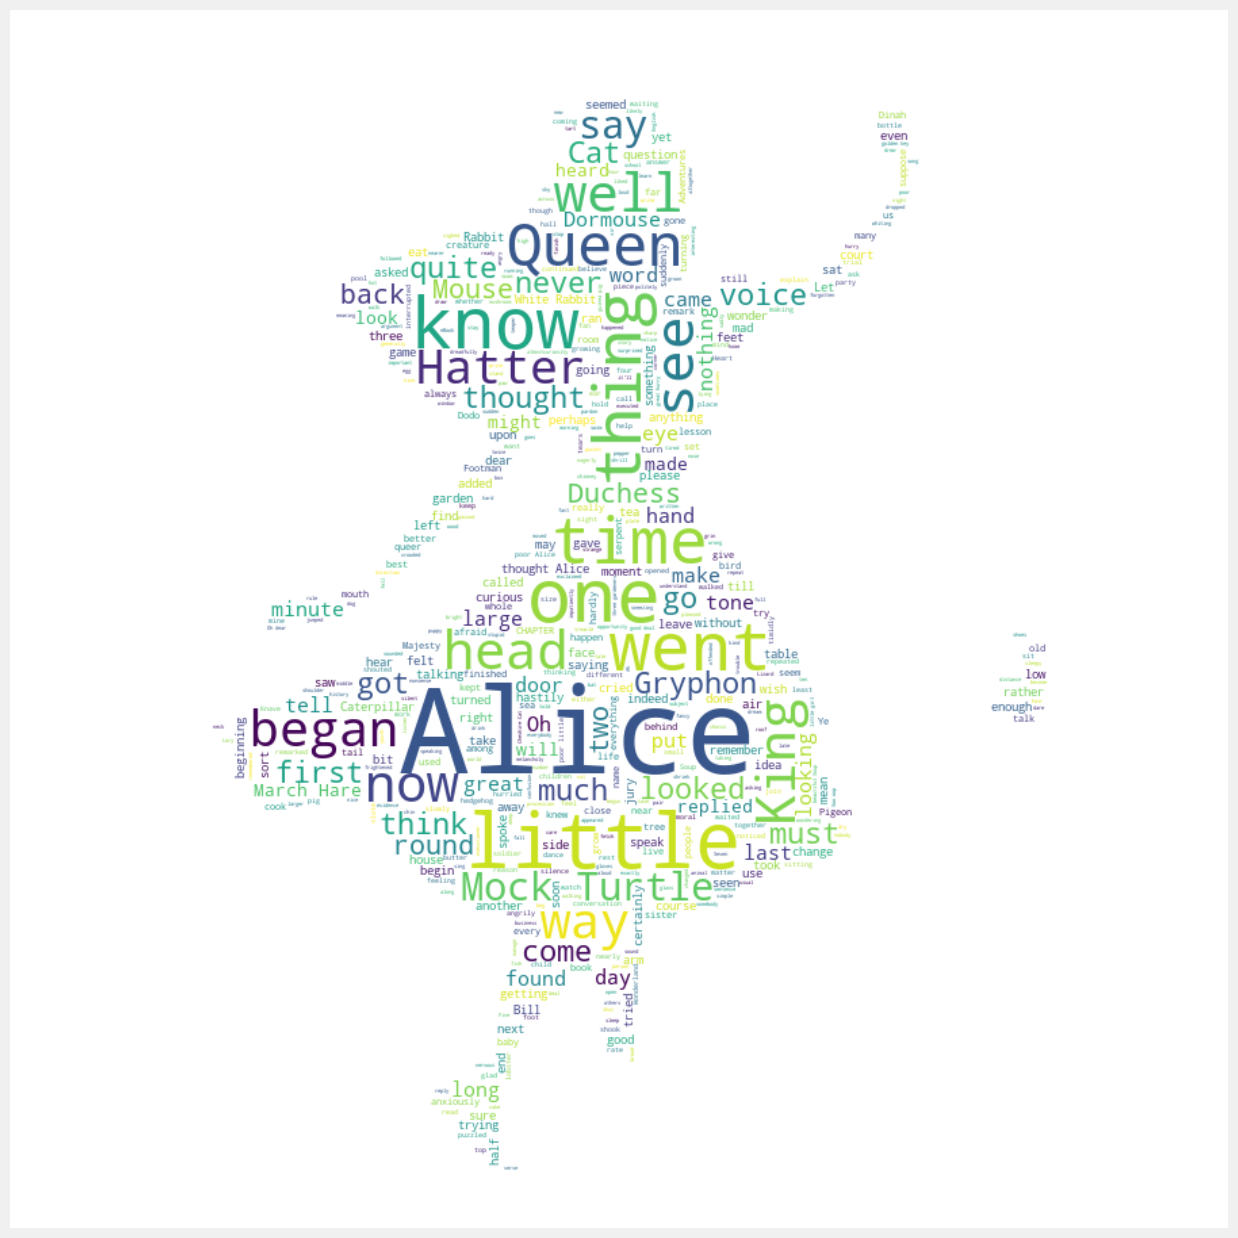

In [63]:
alice_wordcloud = WordCloud(
    background_color= 'white',
    max_words = 2000,
    stopwords = stopwords,
    mask = alice_mask)
alice_wordcloud.generate(alice_novel)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wordcloud, interpolation='bilinear')
plt.axis('off')

In [64]:
import seaborn as sns
import pandas as pd

In [65]:
canada_immigration = pd.read_excel(
    "data/Canada.xlsx",
    sheet_name="Canada by Citizenship",
    skiprows=range(20),
    skipfooter=2)

In [66]:
canada_immigration

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [67]:
total_immigrants = pd.DataFrame(canada_immigration[range(1980, 2014)].sum(axis=0))
total_immigrants.reset_index(inplace=True)
total_immigrants.columns = ["year", "total"]
total_immigrants.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<AxesSubplot:xlabel='year', ylabel='total'>

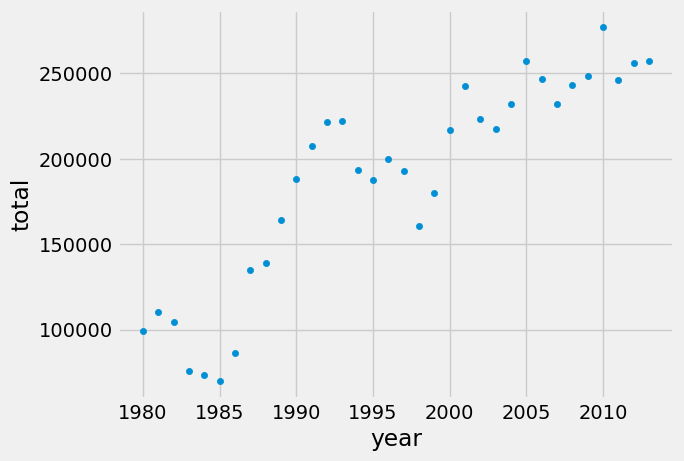

In [68]:
total_immigrants.plot(kind='scatter',x='year', y='total')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 to 2013')

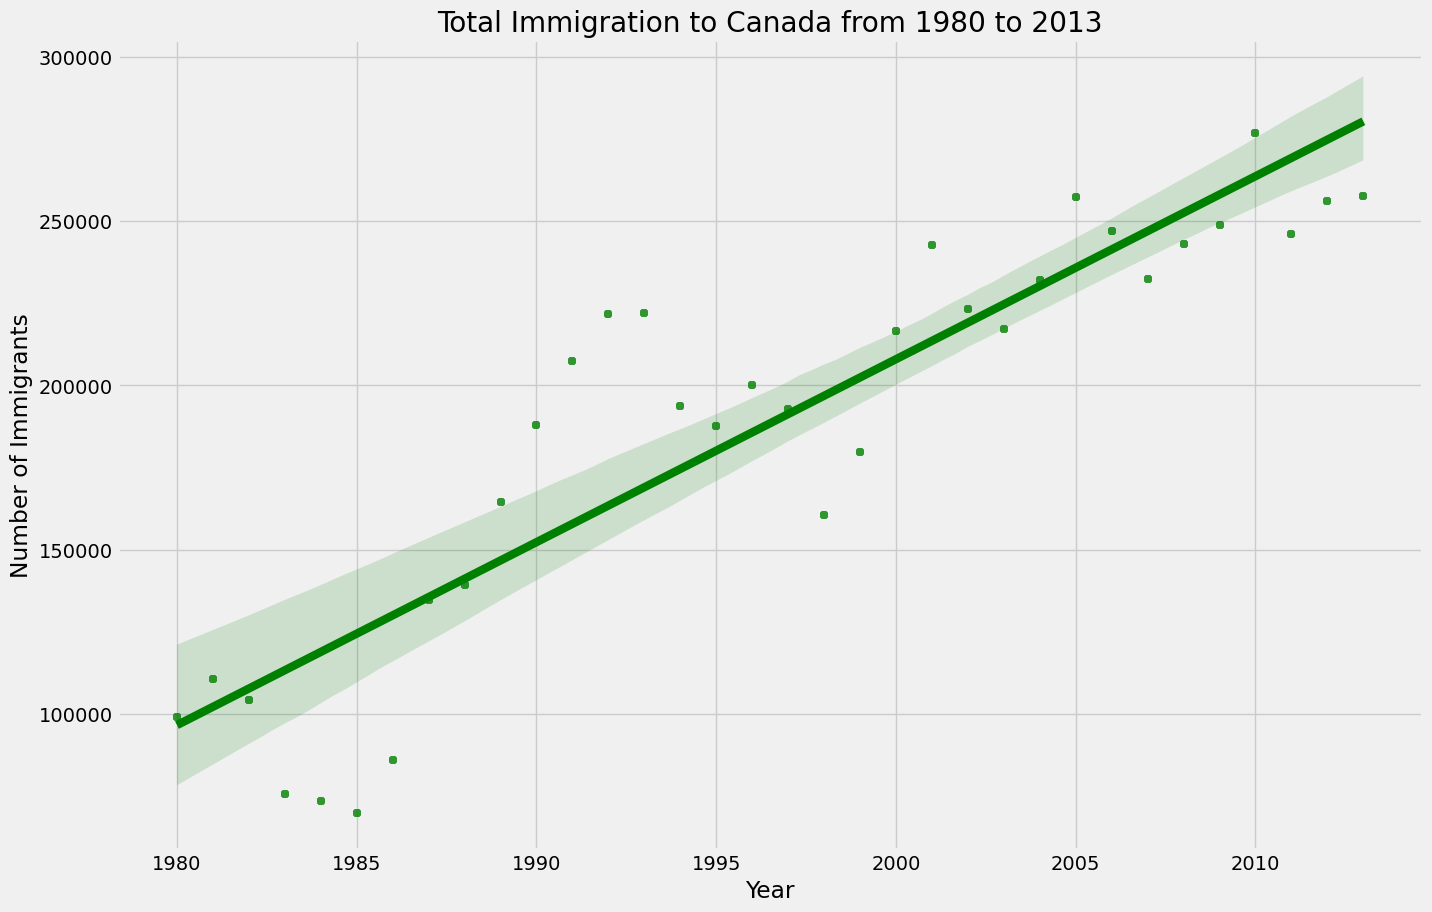

In [69]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=total_immigrants,color='green', marker='+')

ax.set_xlabel("Year")
ax.set_ylabel("Number of Immigrants")
ax.set_title("Total Immigration to Canada from 1980 to 2013")

# Map

In [70]:
incidents_data = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv")

In [71]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [72]:
import folium
import pandas as pd
import numpy as np

In [73]:
world_map = folium.Map()

In [74]:
world_map

In [75]:
jakarta_map = folium.Map(location=[-6.1754, 106.8272], zoom_start=10)
jakarta_map

In [76]:
jakarta_map = folium.Map(location=[-6.1754, 106.8272], zoom_start=10, tiles='CartoDB positron')
jakarta_map

In [77]:
incidents_data

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


In [78]:
limit = 100
incidents_data = incidents_data.loc[0:limit, :]

In [79]:
incidents_data.shape

(101, 13)

In [80]:
sflat = 37.77
sflong = -122.43

In [81]:
sfmap = folium.Map(location=[sflat,sflong], zoom_start=12)
sfmap

In [82]:
incidents_data

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,160015163,NON-CRIMINAL,AIDED CASE,Wednesday,01/06/2016 12:00:00 AM,16:09,MISSION,NONE,14TH ST / FOLSOM ST,-122.415616,37.768536,"(37.7685360123583, -122.41561633832)",16001516351040
97,160015276,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Tuesday,01/05/2016 12:00:00 AM,20:00,PARK,NONE,1000 Block of COLE ST,-122.449752,37.764430,"(37.7644297714074, -122.449751652563)",16001527605073
98,160015276,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Tuesday,01/05/2016 12:00:00 AM,20:00,PARK,NONE,1000 Block of COLE ST,-122.449752,37.764430,"(37.7644297714074, -122.449751652563)",16001527606224
99,160015282,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,01/05/2016 12:00:00 AM,17:00,TARAVAL,NONE,0 Block of ARDENWOOD WY,-122.472716,37.735268,"(37.7352681469084, -122.472715759631)",16001528206244


In [83]:
for i in zip(incidents_data['Y'].values,incidents_data['X'].values) :
    print(i)

(37.775420706711, -122.403404791479)
(37.775420706711, -122.403404791479)
(37.7299809672996, -122.388856204292)
(37.7857883766888, -122.412970537591)
(37.7650501214668, -122.419671780296)
(37.788018555829, -122.426077177375)
(37.7808789360214, -122.405721454567)
(37.7839805592634, -122.411778295992)
(37.7757876218293, -122.393357241451)
(37.7209669615499, -122.387181635995)
(37.7644781578695, -122.477376524003)
(37.7457389429655, -122.477960327299)
(37.7356970275482, -122.37675765553)
(37.7292705199592, -122.432325871028)
(37.791642982384, -122.40090869889)
(37.7837069301545, -122.408595110869)
(37.7572895904578, -122.406870402082)
(37.7489063051829, -122.420354780861)
(37.715765426995, -122.439909766772)
(37.7835699386918, -122.408421116922)
(37.7736186276456, -122.422315670749)
(37.7928412840447, -122.424519835009)
(37.7540986882068, -122.414233849038)
(37.7540986882068, -122.414233849038)
(37.7714939969416, -122.507750131004)
(37.718302204766, -122.474444639595)
(37.7645752317615, -

In [84]:
incidents = folium.map.FeatureGroup()
for lat, long in zip(incidents_data['Y'].values, incidents_data['X'].values):
    incidents.add_child(
        folium.CircleMarker(
            [lat,long]
            ,radius=5
            ,color='yellow'
            ,fill=True
            ,fill_color='blue'
            ,fill_opacity=.6
        )
    )
sfmap.add_child(incidents)    

In [85]:
incidents = folium.map.FeatureGroup()
for lat, long in zip(incidents_data['Y'].values, incidents_data['X'].values):
    incidents.add_child(
        folium.CircleMarker(
            [lat,long]
            ,radius=5
            ,color='yellow'
            ,fill=True
            ,fill_color='blue'
            ,fill_opacity=.6
        )
    )
latitudes = list(incidents_data['Y'].values)
longs = list(incidents_data['X'].values)
labels = list(incidents_data['Category'].values)
for lat, long, label in zip (latitudes, longs, labels):
    folium.Marker(
        [lat,long]
        ,popup=label
    ).add_to(sfmap)
sfmap.add_child(incidents)    

In [86]:
sfmap = folium.Map(location=[sflat, sflong], zoom_start=12)
for lat, long, label in zip(incidents_data['Y'].values, incidents_data['X'].values,incidents_data['Category'].values):
    folium.CircleMarker(
            [lat,long]
            ,radius=5
            ,color='yellow'
            ,fill=True
            ,fill_color='blue'
            ,fill_opacity=.6
            ,popup=label
        ).add_to(sfmap)
sfmap    

In [87]:
from folium import plugins
sfmap = folium.Map(location=[sflat, sflong], zoom_start=12)
incidents = plugins.MarkerCluster().add_to(sfmap)
for lat, long, label in zip(incidents_data['Y'].values, incidents_data['X'].values,incidents_data['Category'].values):
    folium.Marker(
        location=[lat,long]
        ,icon=None
        ,popup=label
    ).add_to(incidents)
sfmap


In [88]:
canada_immigration.drop(["Type", "Coverage", "AREA", "REG","DEV"],axis=1,inplace=True)

In [89]:
canada_immigration.rename(
    columns={'OdName': "Country", 'AreaName':"Continent", 'RegName':"Region"},inplace=True)

In [90]:
canada_immigration['Total'] = canada_immigration.sum(axis=1)

C:\Users\Carenina Amanda P\AppData\Local\Temp\ipykernel_19936\3404531141.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  canada_immigration['Total'] = canada_immigration.sum(axis=1)


In [91]:
years = range(1980, 2014)

In [92]:
canada_immigration[['Country', 'Total']].isna().sum()

Country    0
Total      0
dtype: int64

In [93]:
world_geo = r'data/geojson'
world_map = folium.Map(location=[0,0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=canada_immigration,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)
world_map

C:\Users\Carenina Amanda P\AppData\Roaming\Python\Python39\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
